In [3]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
print(cv2.__version__)

def display_img(img, title):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Load an image from file
img_path = "D:\Short_Course_CV_IVP_2024\standard_test_videos/"

# Test videos can be downloaded from:
# http://vip.cs.nctu.edu.tw/resource_seq.html

4.9.0


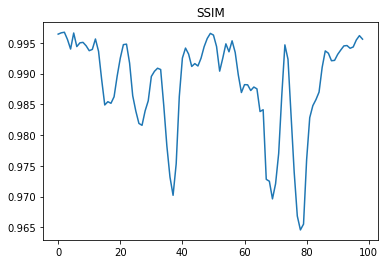

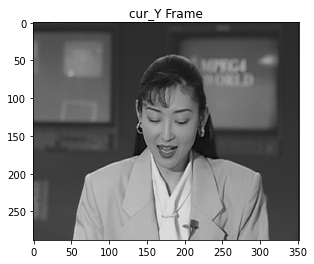

Text(0.5, 1.0, 'ref_Y Frame')

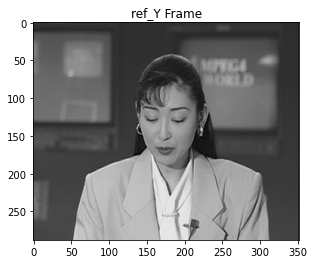

In [58]:
import yuvio
from skimage.metrics import structural_similarity as ssim

filename = img_path + 'akiyo_cif.yuv'
width = 352
height = 288
num_frames = 100

reader = yuvio.get_reader(filename, width, height, "yuv420p")
#writer = yuvio.get_writer(filename, width, height, "yuv420p")

cur_frame_ind = 91
ref_frame_ind = cur_frame_ind - 30

frame_ind = 1
y_frames = []
for yuv_frame in reader:
    y, u, v = yuv_frame   
    y_frames.append(np.array(y))        
    frame_ind += 1

cur_Y = y_frames[cur_frame_ind]
ref_Y = y_frames[ref_frame_ind]

ssim_values = []
for i in range(1, num_frames):
    ssim_value, _ = ssim(y_frames[i], y_frames[i-1], full=True)
    ssim_values.append(ssim_value)

plt.plot(ssim_values)
plt.title('SSIM')
plt.show()

#print(y_frames)
plt.imshow(cur_Y, cmap='gray')
plt.title('cur_Y Frame')
plt.show()

plt.imshow(ref_Y, cmap='gray')
plt.title('ref_Y Frame')

In [55]:
# Define block size and search area
block_size = 16
search_area = 8

# Iterate over each block in the reference frame
motion_vectors = []
for y in range(0, height, block_size):
    for x in range(0, width, block_size):
        # Define the current block
        block = cur_Y[y:y+block_size, x:x+block_size]
        
        # Search for the best match in the target frame within the search area
        min_mse = float('inf')
        best_match = None
        for dy in range(-search_area, search_area+1):
            for dx in range(-search_area, search_area+1):
                target_y = y + dy
                target_x = x + dx
                if target_y < 0 or target_y + block_size > height or target_x < 0 or target_x + block_size > width:
                    continue
                target_block = ref_Y[target_y:target_y+block_size, target_x:target_x+block_size]
                mse = np.sum((block - target_block) ** 2)
                if mse < min_mse:
                    min_mse = mse
                    best_match = (dy, dx)
        
        # Store the motion vector for the current block
        motion_vectors.append(best_match)

# Print motion vectors
print("Motion vectors:", motion_vectors)

Motion vectors: [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, -3), (-1, -4), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, -3), (0, -3), (-1, -5), (-1, -4), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, -2), (4, -4), (-1, -5), (-1, -5), (-2, -5), (-2, -4), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, -6), (-1, -5), (